In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from keras.layers import Bidirectional

c:\Users\MuhammadAulia\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/dataSentimen.csv')
df

,Message,sentimen_bert,sentimen_vader
0,siap siap buat isi full tank bro,positive,neutral
1,promo tebar undi apa bisa ikut,neutral,neutral
2,oke siap noted,negative,neutral
3,buat guna baru aja sih,negative,neutral
4,ayo ayo,positive,neutral
...,...,...,...
6414,wow promo spesial akhir tahun,positive,positive
6415,kalo gue pake bakal keren gak,negative,neutral
6416,min abis tukar ambil hadiah,neutral,neutral
6417,loh iya besok tahun baru,negative,neutral


In [3]:
# Reset nomor baris data
df = df.reset_index(drop=True)

In [10]:
# # Load sentiment classifier
# classifier = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# # Fungsi prediksi sentimen
# def prediksi_sentimen(teks):
#     hasil = classifier(teks)
#     # hasil berupa list dict: [{'label': 'POS', 'score': 0.99}]
#     return hasil[0]['label']

# # Terapkan ke kolom cleaned_text (ini akan butuh waktu karena 11k data)
# df['sentimen'] = df['cleaned_text'].apply(prediksi_sentimen)

In [11]:
# df.to_csv("data/dataSentimen.csv", index=False)

## Visualization

In [3]:
df = pd.read_csv('data/dataSentimen.csv')
df['sentimen_vader'] = df['sentimen_vader'].replace({
    'positive': 'positif',
    'negative': 'negatif',
    'neutral': 'netral'
})

df['sentimen_vader'] = df['sentimen_vader'].replace({
    'positive': 'positif',
    'negative': 'negatif',
    'neutral': 'netral'
})

df

,Message,sentimen_bert,sentimen_vader
0,siap siap buat isi full tank bro,positive,netral
1,promo tebar undi apa bisa ikut,neutral,netral
2,oke siap noted,negative,netral
3,buat guna baru aja sih,negative,netral
4,ayo ayo,positive,netral
...,...,...,...
6414,wow promo spesial akhir tahun,positive,positif
6415,kalo gue pake bakal keren gak,negative,netral
6416,min abis tukar ambil hadiah,neutral,netral
6417,loh iya besok tahun baru,negative,netral


In [4]:
tb_counts = df.sentimen_vader.value_counts()
tb_counts

sentimen_vader
netral     5672
positif     591
negatif     156
Name: count, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}, xlabel='Sentimen', ylabel='Jumlah Tweet'>

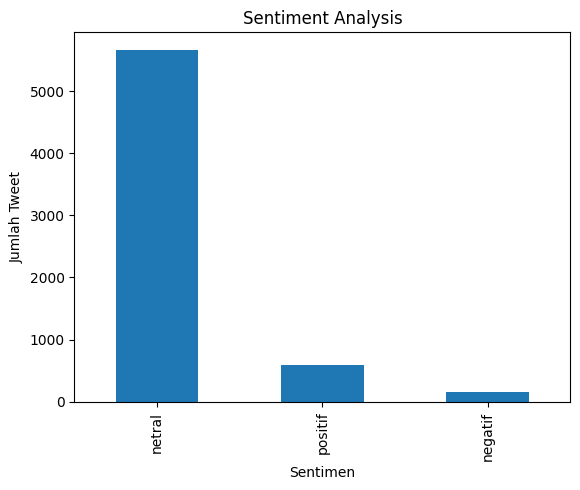

In [5]:
df['sentimen_vader'].value_counts().plot(kind='bar', title='Sentiment Analysis', xlabel='Sentimen', ylabel='Jumlah Tweet')

In [6]:
data_negatif = df[df['sentimen_vader'] == 'negatif']
data_positif = df[df['sentimen_vader'] == 'positif']
data_netral = df[df['sentimen_vader'] == 'netral']

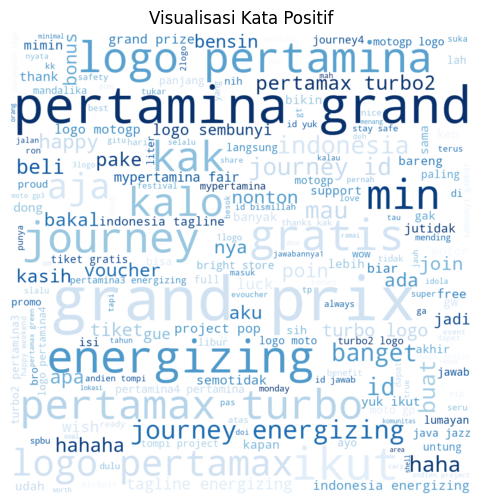

In [7]:
all_text_s1 = ' '.join(word for word in data_positif["Message"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

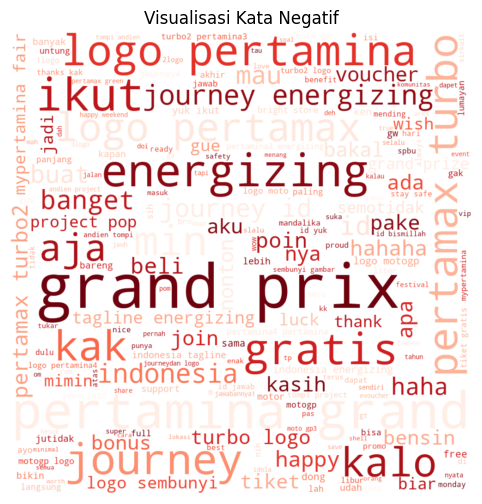

In [8]:
all_text_s2 = ' '.join(word for word in data_negatif["Message"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

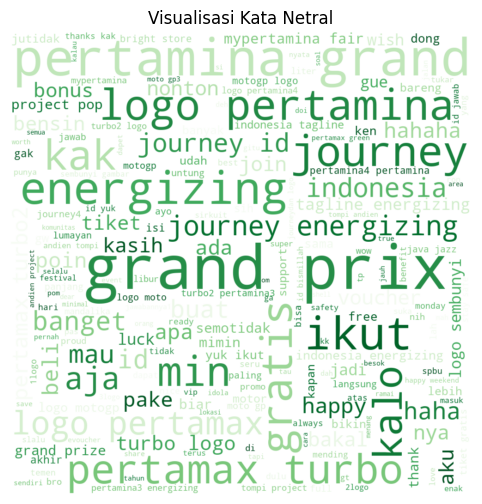

In [9]:
all_text_s3 = ' '.join(word for word in data_netral["Message"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Netral")
plt.margins(x=0, y=0)
plt.show()

## BERT

In [10]:
data = df[['Message', 'sentimen_vader']]
data

,Message,sentimen_vader
0,siap siap buat isi full tank bro,netral
1,promo tebar undi apa bisa ikut,netral
2,oke siap noted,netral
3,buat guna baru aja sih,netral
4,ayo ayo,netral
...,...,...
6414,wow promo spesial akhir tahun,positif
6415,kalo gue pake bakal keren gak,netral
6416,min abis tukar ambil hadiah,netral
6417,loh iya besok tahun baru,netral


In [11]:
data['sentimen_vader'] = data['sentimen_vader'].replace({
    'positif':1,
    'negatif':2,
    'netral':0
})

C:\Users\MuhammadAulia\AppData\Local\Temp\ipykernel_23652\2549246093.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentimen_vader'] = data['sentimen_vader'].replace({
C:\Users\MuhammadAulia\AppData\Local\Temp\ipykernel_23652\2549246093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimen_vader'] = data['sentimen_vader'].replace({


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6419 entries, 0 to 6418
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Message         6419 non-null   object
 1   sentimen_vader  6419 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 100.4+ KB


In [13]:
# === Preprocessing ===
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Message'].values)
X = tokenizer.texts_to_sequences(data['Message'].values)
X = pad_sequences(X)

In [15]:
# === Label (sudah berupa angka 0/1/2) ===
Y = data['sentimen_vader'].values  # Sudah 0, 1, 2

In [16]:
# === Split Data ===
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (5135, 43)
Testing shape: (1284, 43)


In [17]:
# === Model Definition ===
embed_dim = 128
lstm_out = 196
num_classes = len(np.unique(Y))

model = Sequential()
model.add(Embedding(max_fatures, embed_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(num_classes, activation='softmax'))  # Karena multi-class (0,1,2)

# Gunakan sparse_categorical_crossentropy karena Y berbentuk integer label (bukan one-hot)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

c:\Users\MuhammadAulia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
# === Train Model ===
batch_size = 128
history = model.fit(X_train, Y_train, epochs=25, batch_size=batch_size, verbose=1)

Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.8119 - loss: 0.6013
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.8880 - loss: 0.3836
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 0.9068 - loss: 0.2883
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 0.9458 - loss: 0.1824
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - accuracy: 0.9589 - loss: 0.1306
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.9660 - loss: 0.0946
Epoch 7/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.9738 - loss: 0.0986
Epoch 8/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - accuracy: 0.9781 - loss: 0.0665
Epoch 9/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.9809 - loss: 0.0628
Epoch 10/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.9882 - loss: 0.0488
Epoch 11/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.9931 - loss: 0.0340
Epoch 12/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/s

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Akurasi Sistem (Testing): 96.11%



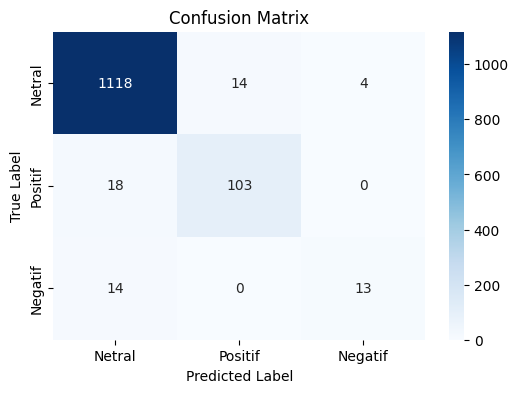

Classification Report:

              precision    recall  f1-score   support

      Netral       0.97      0.98      0.98      1136
     Positif       0.88      0.85      0.87       121
     Negatif       0.76      0.48      0.59        27

    accuracy                           0.96      1284
   macro avg       0.87      0.77      0.81      1284
weighted avg       0.96      0.96      0.96      1284



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi pada data testing
Y_pred = model.predict(X_test, batch_size=batch_size)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Hitung akurasi testing
test_accuracy = accuracy_score(Y_test, Y_pred_classes)
print(f"Akurasi Sistem (Testing): {test_accuracy * 100:.2f}%\n")

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Netral', 'Positif', 'Negatif'],
            yticklabels=['Netral', 'Positif', 'Negatif'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Classification report
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred_classes, target_names=['Netral', 'Positif', 'Negatif']))

Classification Report:

              precision    recall  f1-score   support

      Netral       0.97      0.98      0.98      1136
     Positif       0.88      0.85      0.87       121
     Negatif       0.76      0.48      0.59        27

    accuracy                           0.96      1284
   macro avg       0.87      0.77      0.81      1284
weighted avg       0.96      0.96      0.96      1284

